In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
demand_df = pd.read_csv('Desktop/Datasets/Food Delivery/train.csv')
demand_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
center_info_df = pd.read_csv('Desktop/Datasets/Food Delivery/fulfilment_center_info.csv')
center_info_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
meal_df = pd.read_csv('Desktop/Datasets/Food Delivery/meal_info.csv')
meal_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


## Merge the three dataframes 

In [5]:
full_df = demand_df.merge(center_info_df, on='center_id')
full_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [6]:
full_df = full_df.merge(meal_df, on='meal_id')
full_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [9]:
full_df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


## Features

1. id - Unique ID

2. week - Week No

3. center_id - Unique ID for fulfillment center

4. meal_id - Unique ID for Meal

5. checkout_price - Final price including discount, taxes & delivery charges

6. base_price - Base price of the meal

7. emailer_for_promotion - Emailer sent for promotion of meal

8. homepage_featured - Meal featured at homepage

9. num_orders - Orders Count (Target)

10. city_code - Unique code for city

11. region_code - Unique code for region

12. center_type - Anonymized center type

13. op_area - Area of operation (in km^2)

14. category - Type of meal (beverages/snacks/soup/...)

15. cuisine - Meal cuisine (Indian/Italian/…)

## Check for duplicate values

In [10]:
duplicate_series = full_df['id'].duplicated(keep='first') 
full_df[duplicate_series]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine


## Data Exploration
Target Feature is Number of orders

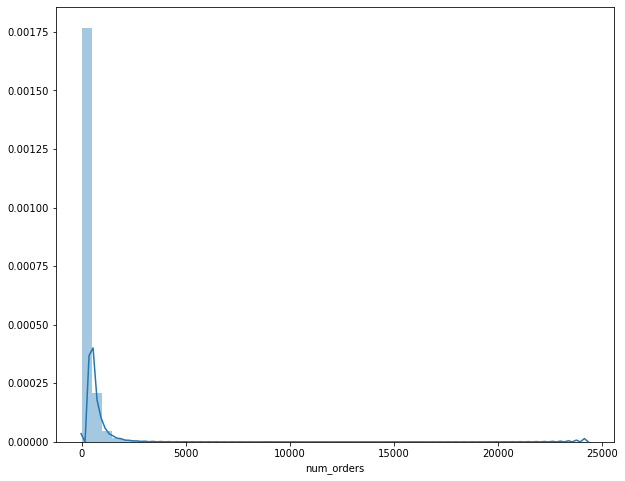

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(full_df['num_orders']);

In [16]:
full_df['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

### Separate Numerical and Categorical Features

In [7]:
df_cat = full_df[['num_orders','week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured',
             'city_code', 'region_code', 'center_type', 'category', 'cuisine']]
df_num = full_df[['num_orders', 'checkout_price', 'base_price', 'op_area']]

In [21]:
df_cat.head()

,num_orders,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,category,cuisine
0,177,1,55,1885,0,0,647,56,TYPE_C,Beverages,Thai
1,323,2,55,1885,0,0,647,56,TYPE_C,Beverages,Thai
2,96,3,55,1885,0,0,647,56,TYPE_C,Beverages,Thai
3,163,4,55,1885,0,0,647,56,TYPE_C,Beverages,Thai
4,215,5,55,1885,0,0,647,56,TYPE_C,Beverages,Thai


In [22]:
df_num.head()

,num_orders,checkout_price,base_price,op_area
0,177,136.83,152.29,2.0
1,323,135.83,152.29,2.0
2,96,132.92,133.92,2.0
3,163,135.86,134.86,2.0
4,215,146.50,147.50,2.0


## Correlation with Numerical Features

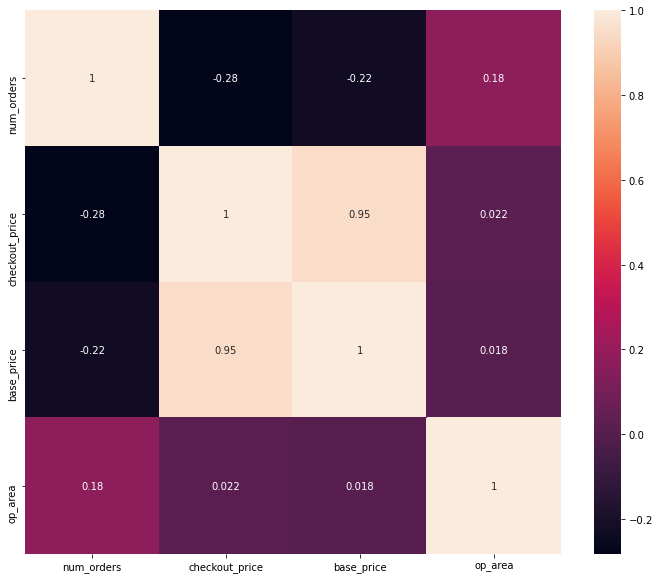

In [23]:
corr_matrix = df_num.corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True);

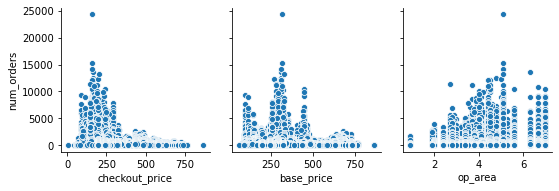

In [29]:
sns.pairplot(data=df_num,
            x_vars=['checkout_price','base_price','op_area'],
            y_vars=['num_orders']);

Based on these graphs:
1. There is a negative correlation with the checkout price and base price and the number of orders. Note that there is a spike in the orders between 250 and 500 for base price, and this can be due to the demand for the product and other factors.
2. Also there is a positive trend as operation area increases, the number of orders increases.

## Distribution of numerical Features

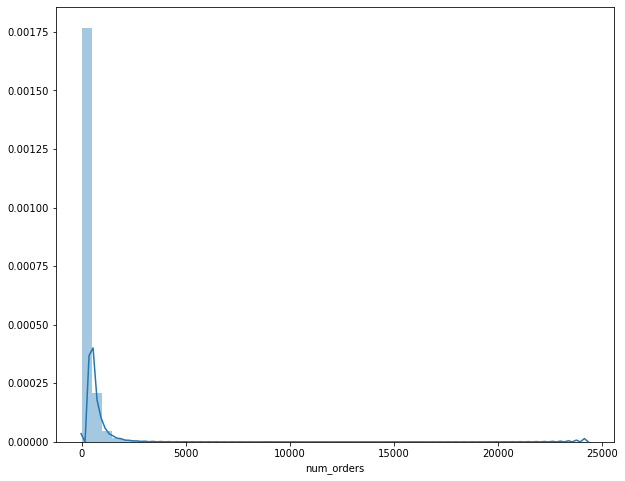

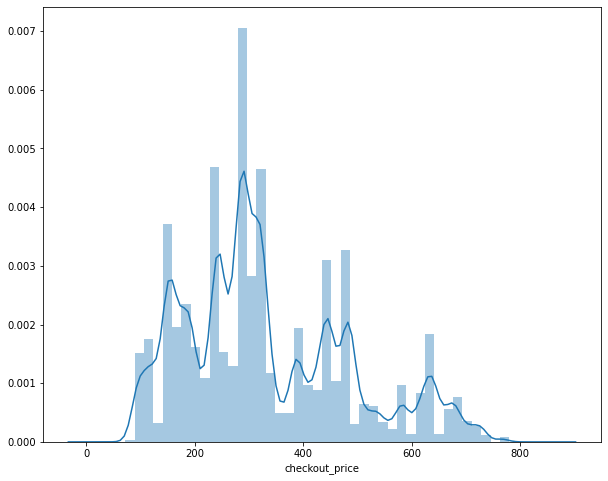

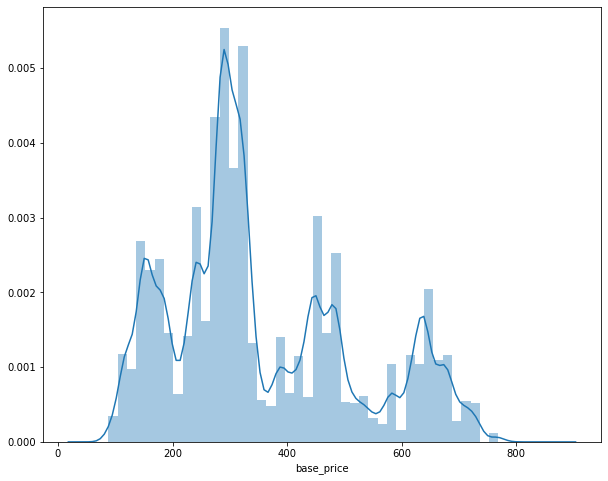

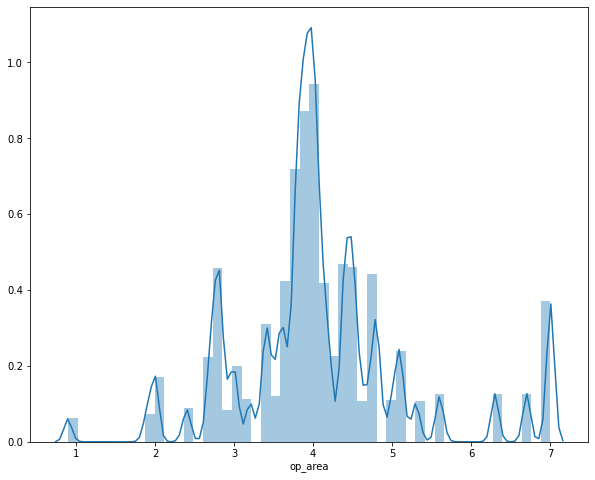

In [26]:
for i in df_num.columns:
    fig, ax = plt.subplots(figsize=(10,8))
    sns.distplot(df_num[i]);

In [27]:
df_num.describe()

,num_orders,checkout_price,base_price,op_area
count,456548.000000,456548.000000,456548.000000,456548.000000
mean,261.872760,332.238933,354.156627,4.083590
std,395.922798,152.939723,160.715914,1.091686
min,13.000000,2.970000,55.350000,0.900000
25%,54.000000,228.950000,243.500000,3.600000
50%,136.000000,296.820000,310.460000,4.000000
75%,324.000000,445.230000,458.870000,4.500000
max,24299.000000,866.270000,866.270000,7.000000


In [32]:
df_num.groupby('num_orders')['checkout_price'].mean().sort_index(ascending=False).head(60)

num_orders
24299    159.080
15336    159.080
14229    156.200
13580    162.990
13150    204.700
12489    162.020
12327    194.030
12177    159.110
12137    162.020
11380    144.560
11260    160.050
11246    163.020
11110    192.120
11056    171.720
10745    162.020
10544    240.560
10449    160.050
10435    157.140
10259    162.050
10193    171.690
10140    192.090
10124    163.990
9855     230.890
9828     163.990
9815     163.020
9773     192.090
9532     171.690
9303      88.270
9249     161.050
9220     192.120
9114     235.710
9045     110.640
9044     159.110
9019     170.780
8979     186.300
8911     191.090
8897     162.990
8884     160.080
8830     169.810
8774     161.080
8762     162.990
8736     184.360
8612     164.960
8585     156.200
8520     220.220
8518     176.085
8492     173.690
8288     159.140
8222     191.090
8169     181.420
8140     177.040
8059     147.500
8034     233.800
7965     170.720
7926     181.420
7911     290.030
7898     146.500
7872     161.050
782

#### Number of orders ranging from 7800 to 25000 have an average checkout price of 200 and below.

In [34]:
df_num.groupby('num_orders')['base_price'].mean().sort_index(ascending=False).head(60)

num_orders
24299    311.430
15336    311.430
14229    310.430
13580    309.430
13150    324.040
12489    309.430
12327    268.690
12177    307.490
12137    309.490
11380    279.360
11260    309.430
11246    309.430
11110    279.420
11056    316.220
10745    311.430
10544    446.230
10449    310.430
10435    310.430
10259    301.730
10193    321.130
10140    278.420
10124    289.090
9855     445.230
9828     309.430
9815     307.490
9773     290.030
9532     281.360
9303      91.210
9249     309.430
9220     278.420
9114     447.230
9045     110.640
9044     311.430
9019     310.400
8979     323.040
8911     289.060
8897     303.670
8884     308.490
8830     324.040
8774     309.430
8762     310.430
8736     282.270
8612     309.430
8585     309.490
8520     283.270
8518     301.230
8492     316.250
8288     310.430
8222     292.030
8169     324.040
8140     317.235
8059     252.200
8034     280.390
7965     282.270
7926     317.220
7911     299.790
7898     252.200
7872     311.430
782

#### Number of orders ranging from 7800 to 25000 have an average base price of below 500 down to 250.  There is an outlier of 91 for base price.

In [33]:
df_num.groupby('num_orders')['op_area'].mean().sort_index(ascending=False).head(60)

num_orders
24299    5.1
15336    5.1
14229    5.1
13580    6.3
13150    5.1
12489    4.8
12327    5.0
12177    4.4
12137    4.5
11380    2.7
11260    3.7
11246    4.5
11110    5.1
11056    4.4
10745    6.7
10544    4.5
10449    7.0
10435    5.6
10259    4.4
10193    4.5
10140    5.1
10124    4.0
9855     5.1
9828     4.2
9815     4.5
9773     5.1
9532     4.0
9303     4.1
9249     7.0
9220     5.1
9114     6.7
9045     4.1
9044     6.3
9019     7.0
8979     6.7
8911     5.0
8897     5.1
8884     4.4
8830     5.1
8774     7.0
8762     3.9
8736     5.1
8612     4.0
8585     4.4
8520     5.1
8518     4.4
8492     4.4
8288     3.9
8222     5.1
8169     5.1
8140     4.5
8059     5.1
8034     4.4
7965     5.1
7926     4.4
7911     6.7
7898     5.1
7872     4.0
7829     3.5
7804     5.1
Name: op_area, dtype: float64

#### Number of orders ranging from 7800 to 25000 have an average operation area of 3 to 6 km^2.

## Distribution of Categorical features

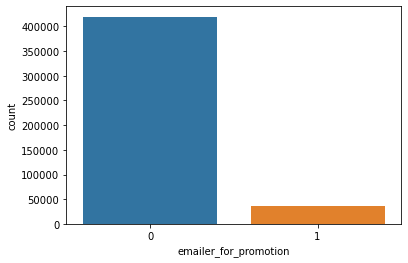

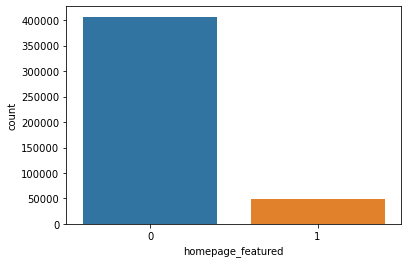

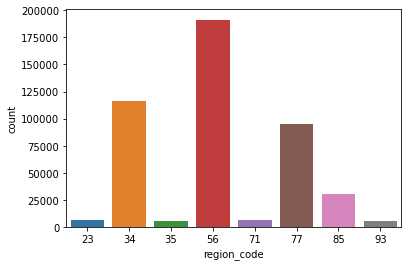

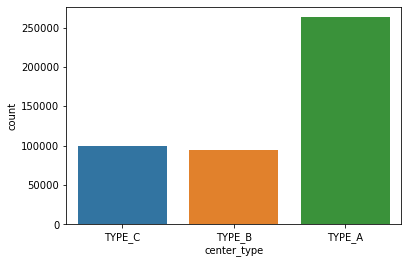

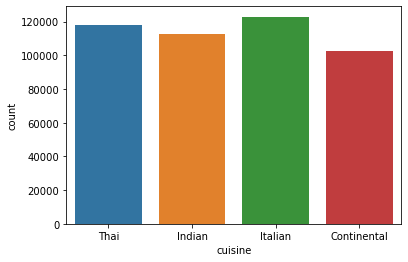

In [56]:
for i in df_cat.columns:
    if i not in ['num_orders','week', 'center_id', 'meal_id', 'city_code', 'category']:
        sns.countplot(x=i, data=df_cat)
        plt.show();

Based on these graphs:
1. More orders did not have an email for promotion and were NOT featured on the homepage
2. Regions 56,34, and 77 appeared more in the orders. 
3. Type A centers had more appearances in orders
4. The cuisines are relatively close, with continental appearing least.

Note this is not the number actual of orders.

#### Features with many values

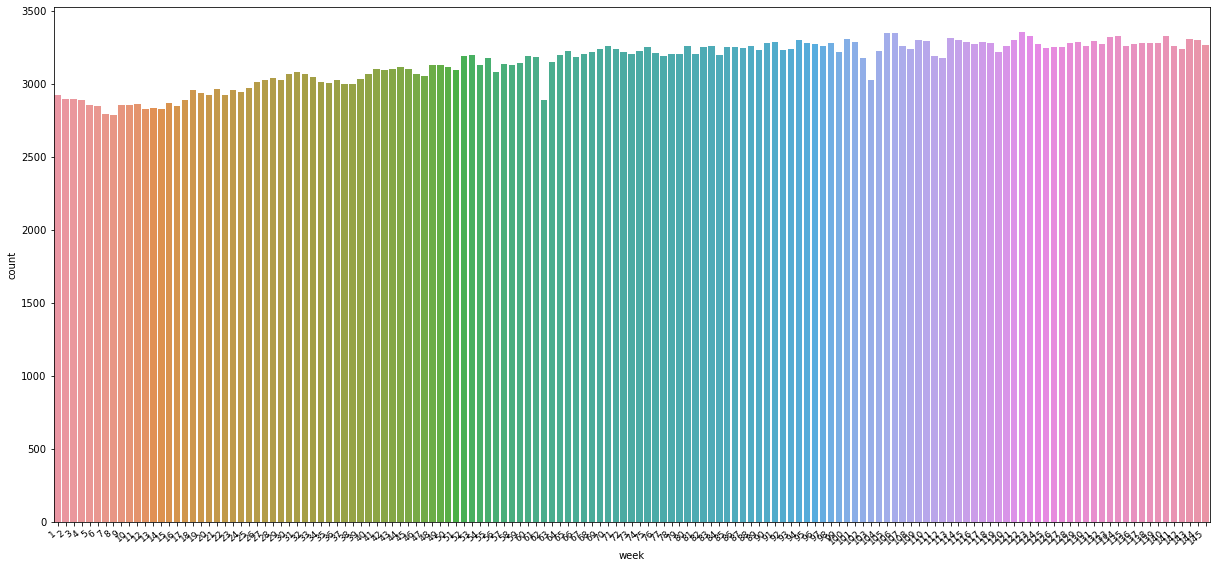

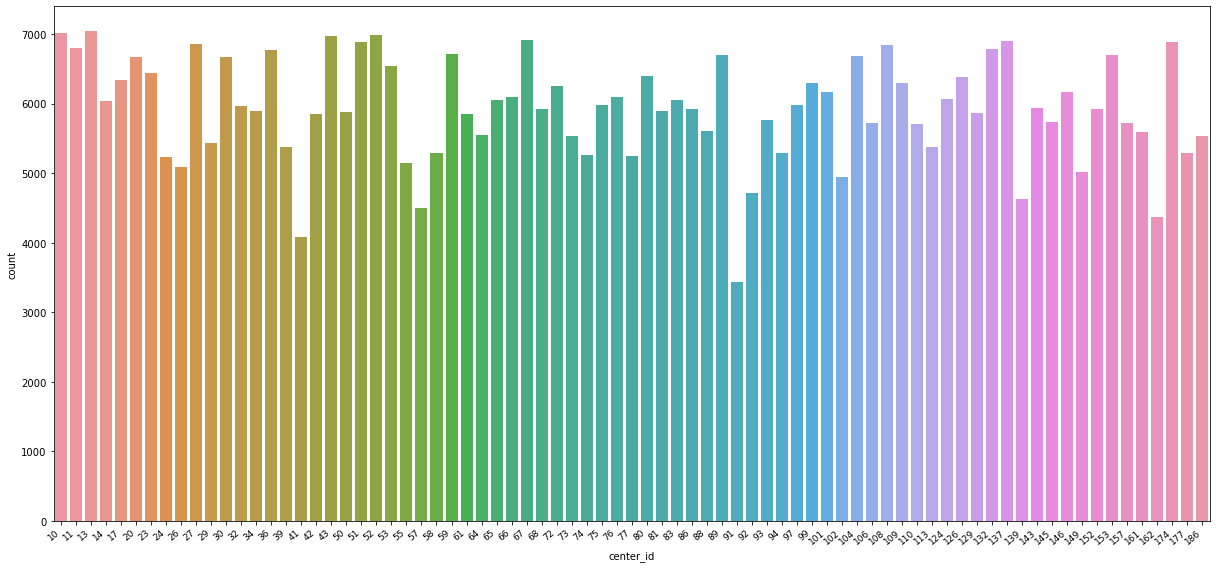

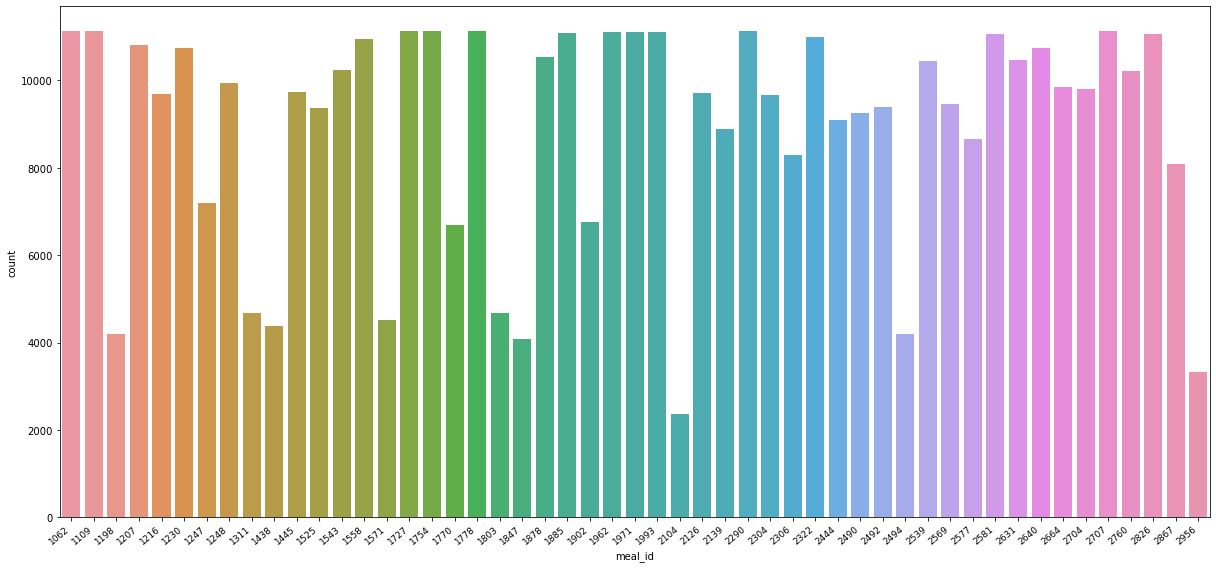

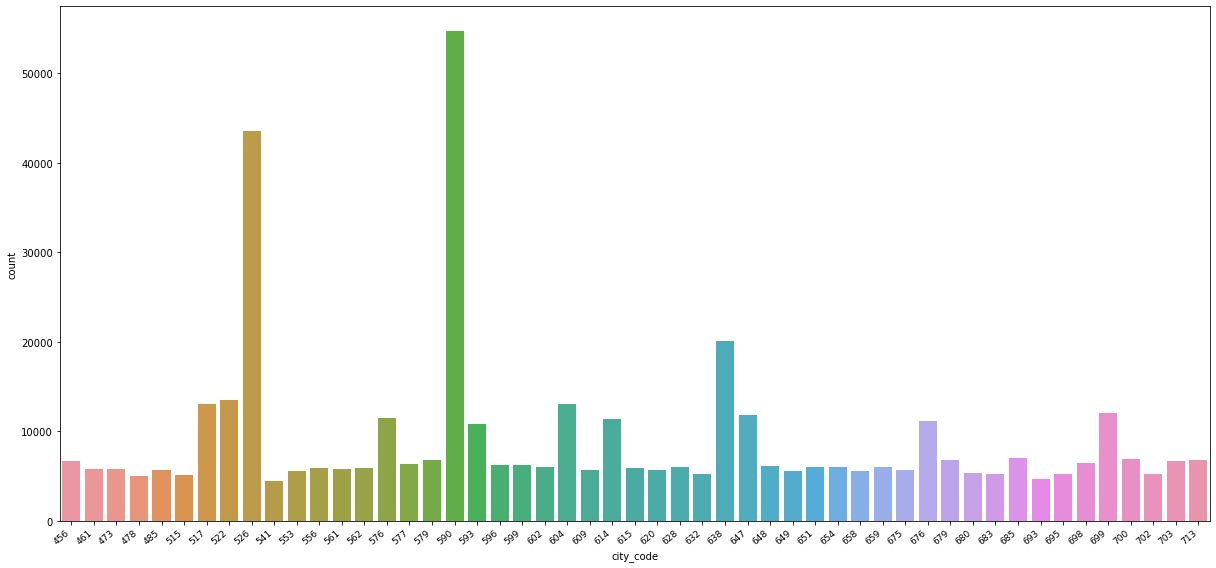

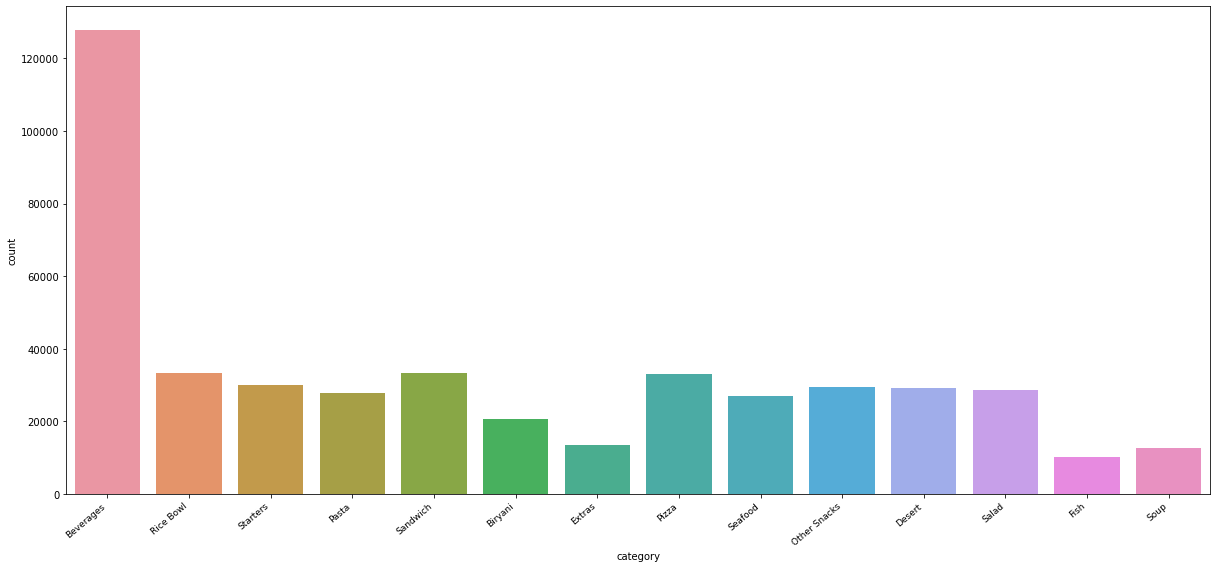

In [66]:
for i in df_cat[['week', 'center_id', 'meal_id', 'city_code', 'category']]:
    plt.figure(figsize=(17,8))
    ax = sns.countplot(x=i, data=df_cat)

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, rotation=40, ha="right")
    plt.tight_layout()
    plt.show();

Based on the graphs:
1. There is a positive upward trend of batches of orders as the weeks progress.
2. Some inconsistencies with the different centers and meals.
3. City codes 590 and 526 had the most appearances in orders
4. Beverages appeared the most in the batches of orders.

Note this is not the number of orders.

## Correlation with Categorical Features and the average number of orders.

In [35]:
df_cat.head()

,num_orders,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,category,cuisine
0,177,1,55,1885,0,0,647,56,TYPE_C,Beverages,Thai
1,323,2,55,1885,0,0,647,56,TYPE_C,Beverages,Thai
2,96,3,55,1885,0,0,647,56,TYPE_C,Beverages,Thai
3,163,4,55,1885,0,0,647,56,TYPE_C,Beverages,Thai
4,215,5,55,1885,0,0,647,56,TYPE_C,Beverages,Thai


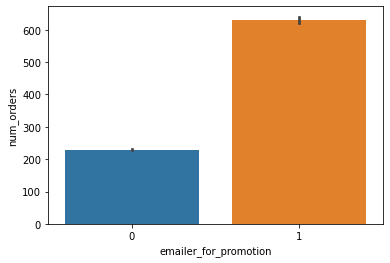

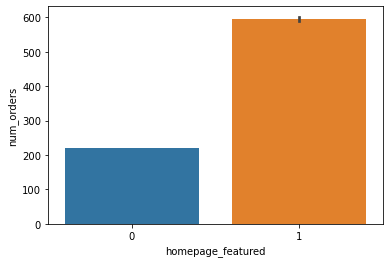

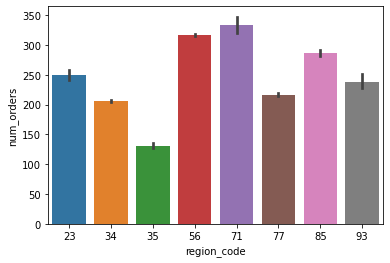

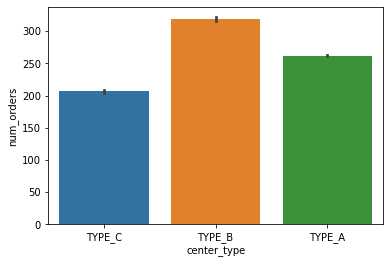

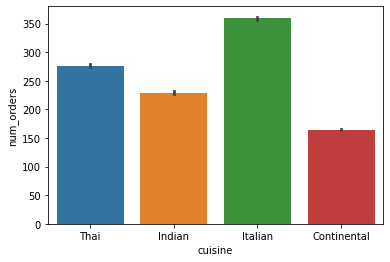

In [67]:
for i in df_cat.columns:
    if i not in ['num_orders','week', 'center_id', 'meal_id', 'city_code', 'category']:
        sns.barplot(x=i, y='num_orders', data=df_cat)
        plt.show();

Based on the graph:
1. Despite having more orders that did NOT have an email promotion and were not featured in the homepage, the orders that did have an email promotion or were featured in the homepage had a HIGHER average of the number of orders.
2. Regions that appeared more in orders did not necessarily perform the best in the number of orders.
3. Type B centers had the highest average number of orders.
4. Italian cuisine had the highest average number or oders while continental had the lowest.

#### Features with many values

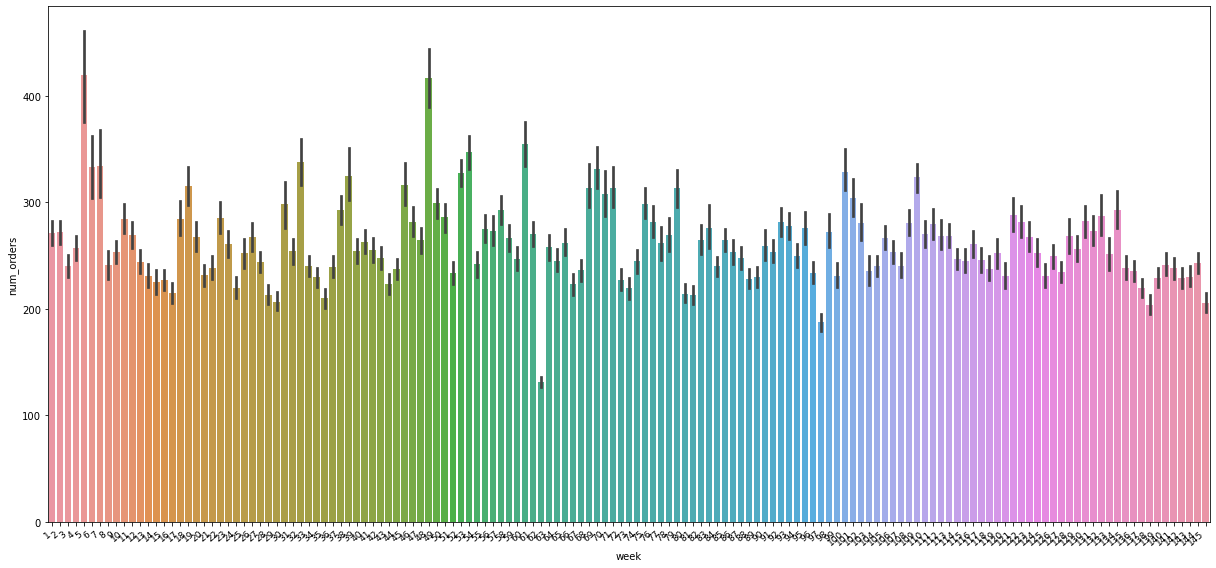

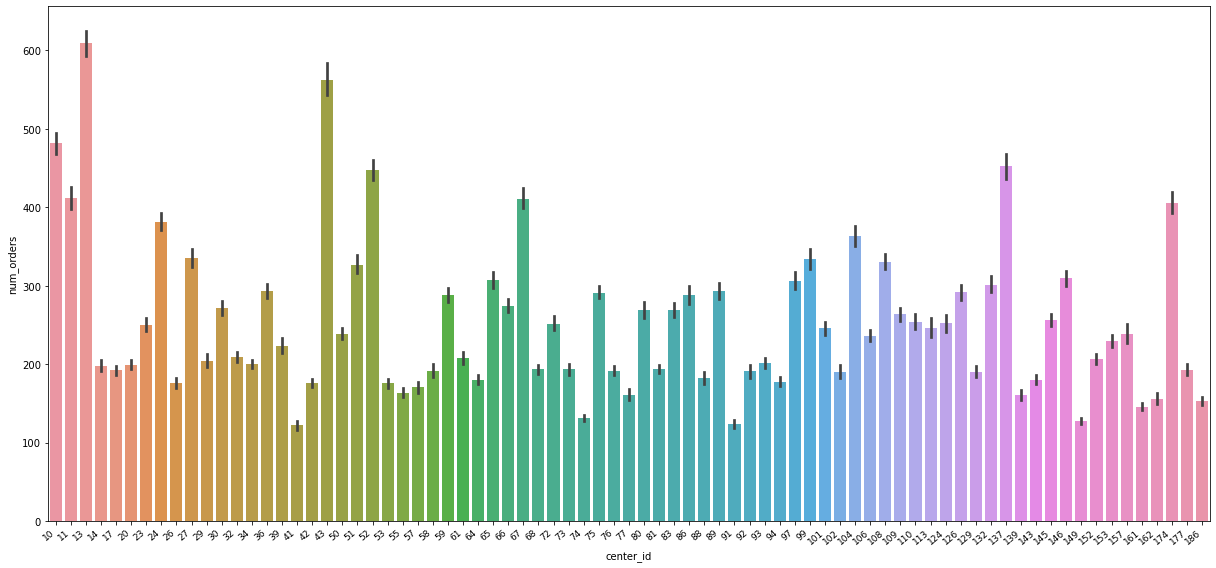

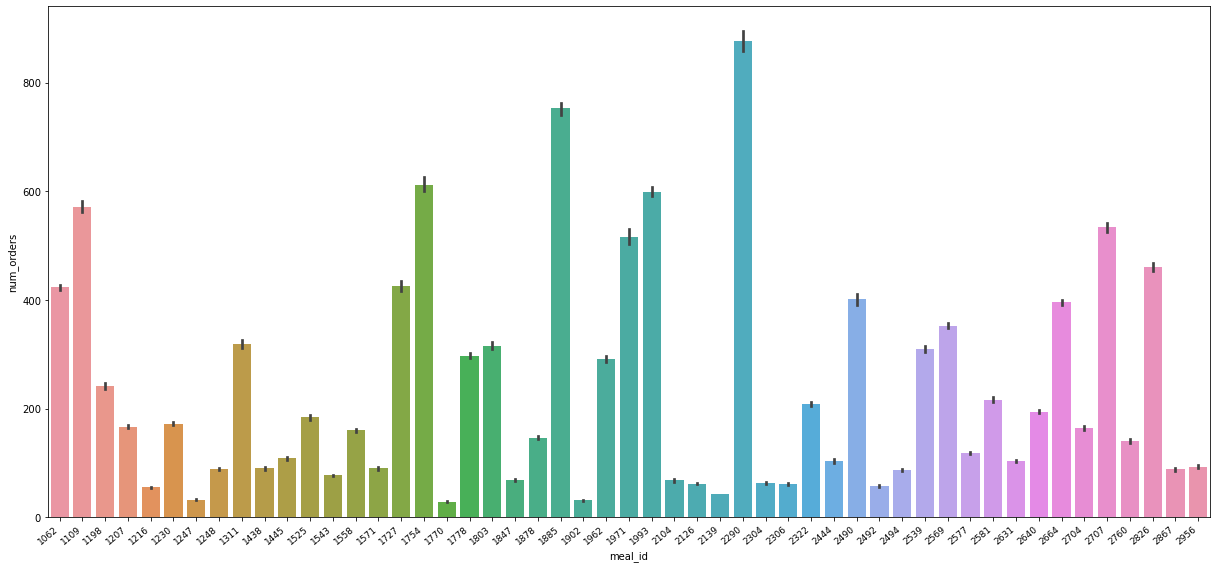

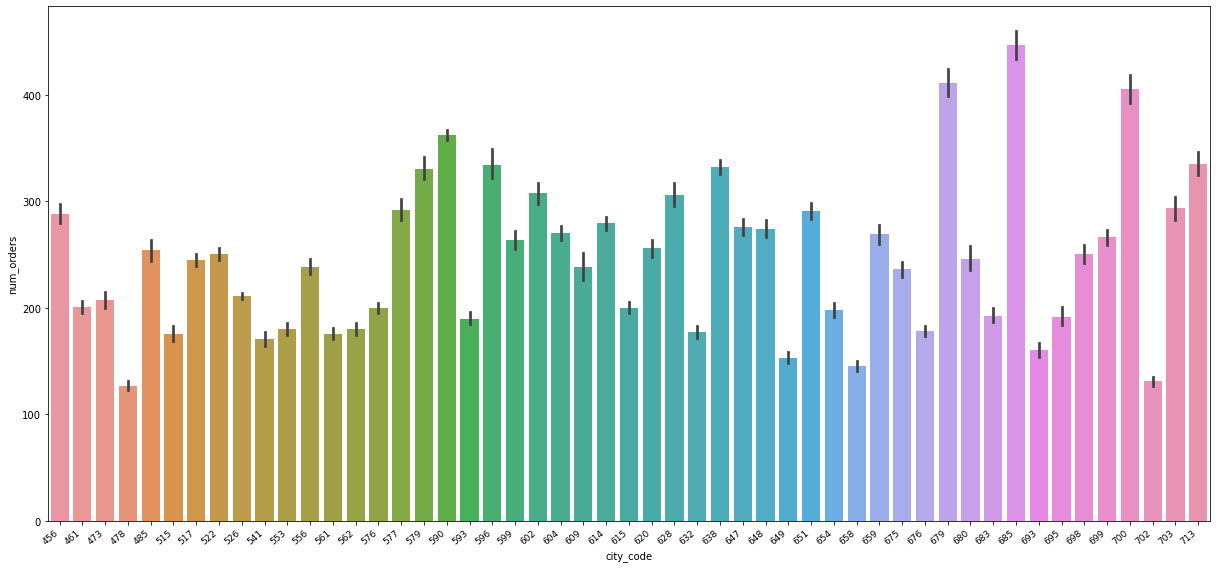

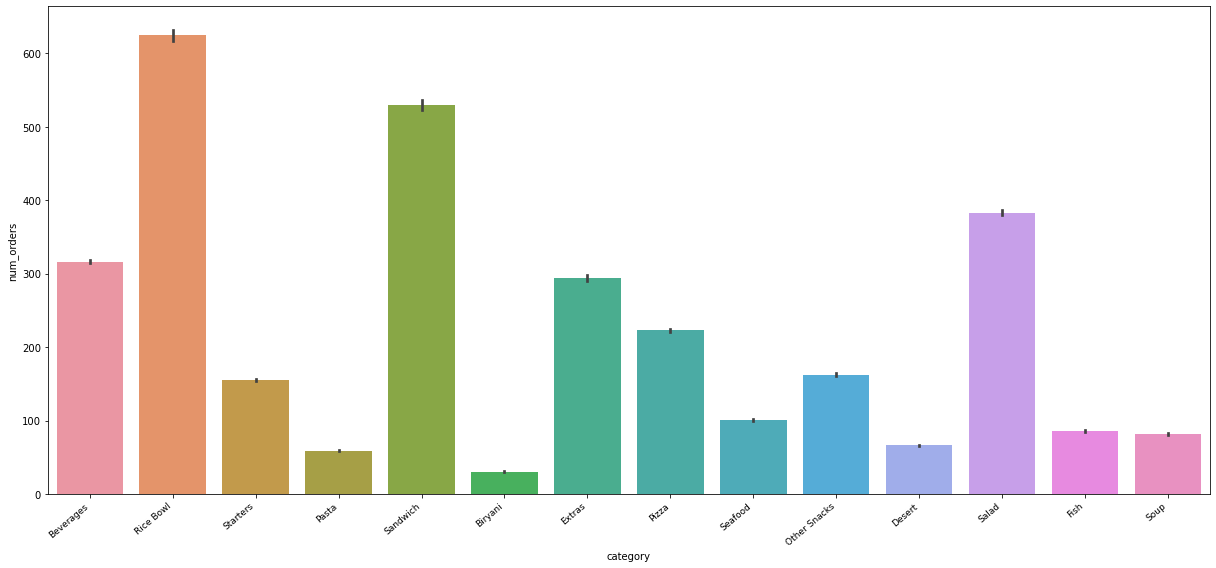

In [69]:
for i in df_cat[['week', 'center_id', 'meal_id', 'city_code', 'category']]:
    plt.figure(figsize=(17,8))
    ax = sns.barplot(x=i, y='num_orders', data=df_cat)

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, rotation=40, ha="right")
    plt.tight_layout()
    plt.show();

#### Plotting the sum of the number of orders by week

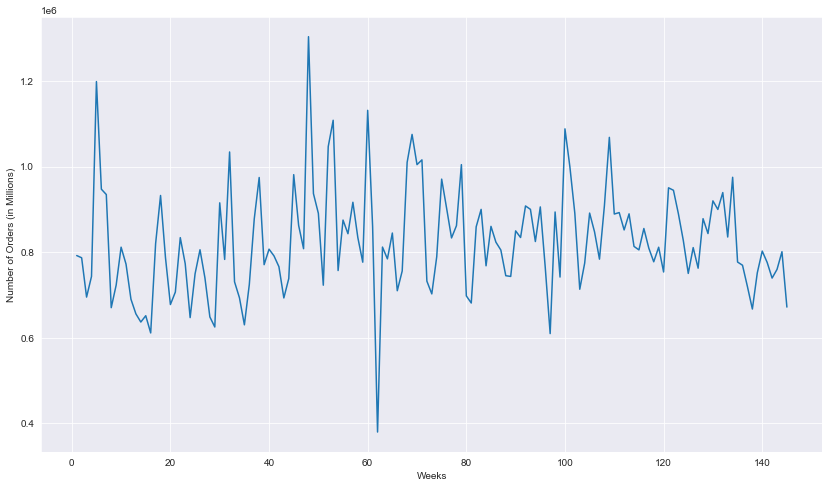

In [151]:
trend_results = df_cat.groupby('week')['num_orders'].sum()
plt.figure(figsize=(14,8))
plt.plot(trend_results)
plt.xlabel('Weeks')
plt.ylabel('Number of Orders (in Millions)');

Weeks with the highest sum of the number of orders.

In [77]:
df_cat.groupby('week')['num_orders'].sum().sort_values(ascending=False).head(60)

week
48     1303457
5      1198675
60     1131459
53     1108236
100    1088162
69     1075188
109    1068318
52     1046811
32     1034202
71     1015726
68     1009974
70     1004649
79     1004611
101     999447
45      981199
134     975072
38      974566
75      970760
121     950500
6       947288
122     944706
132     939374
49      936980
7       934803
18      932560
130     920019
57      916721
30      915399
108     908764
92      908145
95      905841
76      902928
93      900170
83      900091
131     899953
98      894021
111     892631
105     891479
102     890983
50      890778
123     889926
113     889696
110     889255
128     878397
37      877853
55      875145
46      862620
78      862030
85      860433
61      860105
82      859477
116     855465
112     852107
90      849868
106     847485
65      844869
129     843661
56      843250
133     835583
58      834445
Name: num_orders, dtype: int64

Weeks with the lowest sum of the number of orders.

In [78]:
df_cat.groupby('week')['num_orders'].sum().sort_values(ascending=False).tail(60)

week
64     784508
107    783851
31     783214
118    777707
135    777106
59     776781
141    776240
104    774644
23     773271
11     772225
39     770964
136    769623
84     768315
42     766289
96     765117
127    762737
143    759926
54     757268
67     756281
120    753871
139    751935
125    750541
25     749583
88     745193
4      743529
89     743489
99     742048
27     740014
142    739661
44     738583
72     732551
33     730936
36     724865
9      723243
51     723036
137    719740
103    713569
66     710083
21     707013
73     702678
80     698063
3      695262
34     693603
43     693271
12     690259
81     681412
20     677834
145    671926
8      670518
138    667343
13     656102
15     651719
28     648863
24     647341
14     636981
35     630458
29     625414
16     611515
97     609977
62     380065
Name: num_orders, dtype: int64

#### Breaking down the number of orders by region, city and center
Listed below are the top centers with the highest sum of the number of orders.

In [79]:
df_cat.groupby(['region_code', 'city_code', 'center_id'])['num_orders'].sum().sort_values(ascending=False).head(60)

region_code  city_code  center_id
56           590        13           4296545
                        43           3920294
                        10           3381018
             685        52           3125835
             590        137          3117478
             638        67           2839493
             679        11           2797300
             700        174          2792587
             647        104          2427542
85           713        27           2297698
56           579        108          2264042
             638        51           2249169
71           596        99           2103282
56           522        132          2046793
85           614        24           1997535
56           517        36           1987250
             703        89           1969200
             456        59           1937221
34           526        146          1906535
             602        65           1863630
56           577        126          1863012
77           628     

Listed below are the centers with the lowest sum of the number of orders

In [80]:
df_cat.groupby(['region_code', 'city_code', 'center_id'])['num_orders'].sum().sort_values(ascending=False).tail(60)

region_code  city_code  center_id
56           456        59           1937221
34           526        146          1906535
             602        65           1863630
56           577        126          1863012
77           628        97           1833427
56           604        30           1812167
77           651        75           1739081
56           604        80           1721200
85           699        86           1705643
34           648        66           1669741
56           599        109          1659568
77           659        83           1628964
23           698        23           1609906
56           638        72           1573788
             590        153          1536242
                        124          1529024
85           699        101          1515771
77           620        145          1467295
             485        110          1451046
             556        50           1404232
93           609        157          1366290
34           675     

#### Meals by id, category and cuisine
Listed below are the cuisines and categories with the highest sum of the number of orders 

In [81]:
df_cat.groupby(['meal_id', 'category', 'cuisine'])['num_orders'].sum().sort_values(ascending=False).head(60)

meal_id  category      cuisine    
2290     Rice Bowl     Indian         9770303
1885     Beverages     Thai           8346246
1754     Sandwich      Italian        6818059
1993     Beverages     Thai           6656856
1109     Rice Bowl     Indian         6367773
2707     Beverages     Italian        5932792
1971     Sandwich      Italian        5728620
2826     Sandwich      Italian        5090103
1727     Rice Bowl     Indian         4735987
1062     Beverages     Italian        4712795
2664     Salad         Italian        3900812
2490     Salad         Italian        3709125
2569     Salad         Italian        3334399
1778     Beverages     Italian        3308383
1962     Pizza         Continental    3235780
2539     Beverages     Thai           3234528
2581     Pizza         Continental    2399000
2322     Beverages     Continental    2298221
2640     Starters      Thai           2085360
1230     Beverages     Continental    1843969
1207     Beverages     Continental    1800856

Ricebowls, Beverages, Sandwiches and salads from Italian, Thai and Indian cuisines were the top

#### Average Number of orders by Center type

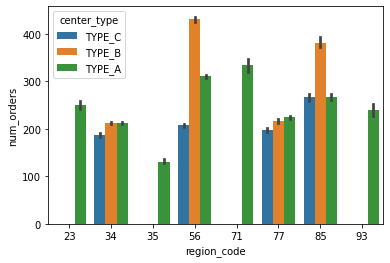

In [15]:
sns.barplot(x='region_code', y='num_orders', data=df_cat, hue='center_type');

Type A center is present in all the regions

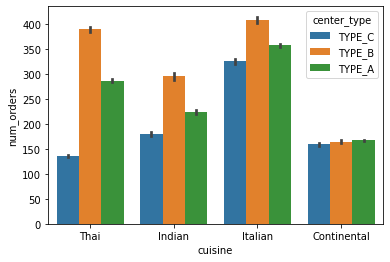

In [9]:
sns.barplot(x='cuisine', y='num_orders', data=df_cat, hue='center_type');

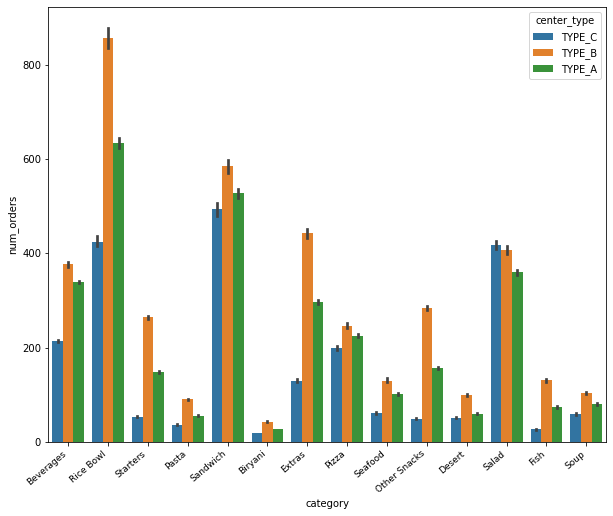

In [13]:
plt.figure(figsize=(10,8))
chart = sns.barplot(x='category', y='num_orders', data=df_cat, hue='center_type')
chart.set_xticklabels(chart.get_xticklabels(), fontsize=9, rotation=40, ha="right");

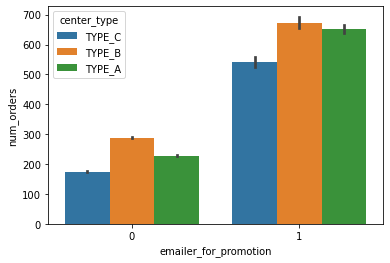

In [16]:
sns.barplot(x='emailer_for_promotion', y='num_orders', data=df_cat, hue='center_type');

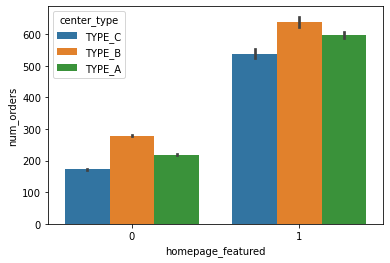

In [17]:
sns.barplot(x='homepage_featured', y='num_orders', data=df_cat, hue='center_type');

Based on the data, Type C is consistently the lowest in terms of the average number of orders while Type A and B consistently have the higher number of orders.

## Adding a Discount column

In [88]:
full_df['discount'] = full_df['base_price'] - full_df['checkout_price']

In [95]:
full_df['discount'].describe()

count    456548.000000
mean         21.917695
std          48.495857
min        -185.300000
25%          -1.000000
50%           1.000000
75%          16.520000
max         561.600000
Name: discount, dtype: float64

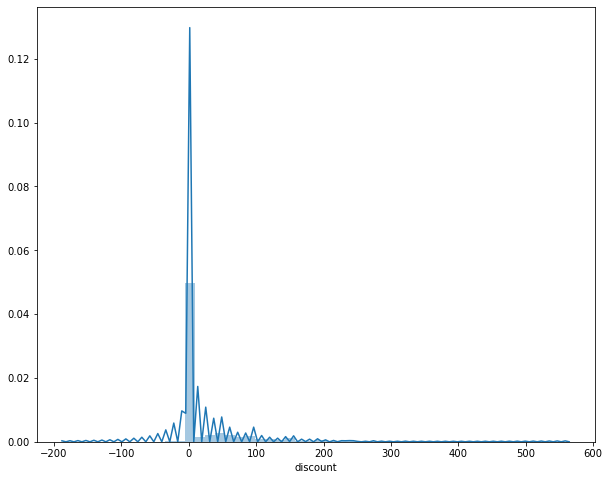

In [94]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(full_df['discount']);

#### Based on the graph, there are orders that had a higher checkout price than the base price

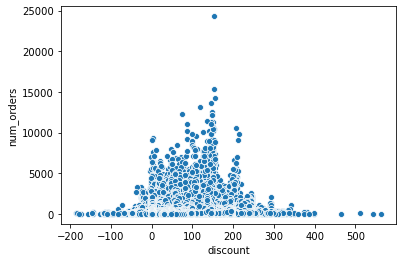

In [92]:
sns.scatterplot(data=full_df,
            x='discount',
            y='num_orders');

In [99]:
full_df.groupby('discount')['num_orders'].mean().sort_values(ascending=False).head(60)

discount
 144.50    11056.000000
 152.35     9566.000000
 139.62     9019.000000
 142.62     8169.000000
 135.80     7926.000000
 125.13     7485.500000
 128.07     6912.000000
 119.31     6481.000000
-3.94       5318.000000
 212.40     5278.000000
 147.44     5273.000000
 123.13     4820.000000
 146.44     4765.000000
 199.79     4672.000000
 211.52     4672.000000
 143.62     4414.000000
 22.25      4225.000000
 141.56     4219.500000
 148.44     4184.000000
 149.38     4171.000000
 118.37     4131.000000
 143.62     3968.000000
 125.13     3871.333333
 192.03     3821.000000
 120.25     3793.000000
 119.25     3712.000000
 133.92     3699.000000
 196.94     3646.000000
 218.25     3645.000000
 191.03     3592.000000
 128.95     3590.000000
 126.13     3551.000000
 205.67     3535.571429
 132.95     3524.000000
 119.37     3517.000000
 123.19     3505.333333
 137.68     3469.500000
 154.29     3455.800000
 200.82     3443.000000
 107.73     3365.857143
 201.79     3309.000000
 141.68

#### Positive correlation with the discount amount. Items that had a higher checkout price than the base price didnt do as well in terms of the average number of orders.

## Forecasting demand through machine learning
Based on the analysis, these will be the columns for predictions:
1. 'checkout_price'
2. 'base_price'
3. 'op_area'
4. 'num_orders'
5. 'week'
6. 'meal_id'
7. 'emailer_for_promotion'
8. 'homepage_featured'
9. 'center_id'

In [103]:
model = full_df[['checkout_price','base_price', 'op_area', 'num_orders', 'meal_id',
                 'emailer_for_promotion', 'homepage_featured', 'center_id']]

#### Feature scaling of numeric values

In [104]:
model.iloc[:,0:3]

,checkout_price,base_price,op_area
0,136.83,152.29,2.0
1,135.83,152.29,2.0
2,132.92,133.92,2.0
3,135.86,134.86,2.0
4,146.50,147.50,2.0
...,...,...,...
456543,583.03,630.53,4.5
456544,581.03,582.03,4.5
456545,583.03,581.03,4.5
456546,582.03,581.03,4.5


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model_scaled = scaler.fit_transform(model.iloc[:,0:3])

In [106]:
model_scaled

array([[-1.27768733, -1.25604767, -1.90859952],
       [-1.28422586, -1.25604767, -1.90859952],
       [-1.30325298, -1.37034885, -1.90859952],
       ...,
       [ 1.63980513,  1.41164378,  0.38143789],
       [ 1.63326659,  1.41164378,  0.38143789],
       [ 1.62672806,  1.41786595,  0.38143789]])

In [107]:
model.iloc[:,0:3] = model_scaled

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### Encoding categorical values

In [108]:
final_model = pd.get_dummies(model, columns=['meal_id', 'emailer_for_promotion', 
                                             'homepage_featured', 'center_id'])

In [109]:
final_model.head()

,checkout_price,base_price,op_area,num_orders,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,...,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186
0,-1.277687,-1.256048,-1.9086,177,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.284226,-1.256048,-1.9086,323,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.303253,-1.370349,-1.9086,96,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.284030,-1.364500,-1.9086,163,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.214460,-1.285852,-1.9086,215,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Split training set

In [110]:
from sklearn.model_selection import train_test_split

X = final_model.drop('num_orders', axis=1)
y = final_model['num_orders'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Modes to test
1. Ridge Regression
2. Elastic Net
3. Support Vector Machine
4. XGBoost

In [111]:
from sklearn.linear_model import Ridge, ElasticNet

ridge_model = Ridge(alpha=1)

In [112]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ridge_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

ridge_rmse_scores = np.sqrt(-scores)

In [42]:
def display_score(score):
    print("Scores: ", score)
    print("Mean: ", score.mean())

In [113]:
display_score(ridge_rmse_scores)

Scores:  [279.49776137 289.4042253  294.37437355 285.68352796 278.81406877]
Mean:  285.5547913880647


In [114]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [115]:
elastic_net_scores = cross_val_score(elastic_net, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

elastic_rmse_scores = np.sqrt(-elastic_net_scores)

In [116]:
display_score(elastic_rmse_scores)

Scores:  [315.76852517 324.67951027 329.21570744 321.18213963 315.10000503]
Mean:  321.18917750771146


In [117]:
from sklearn.svm import LinearSVR

svr_model = LinearSVR(epsilon=1.5)

In [118]:
svr_scores = cross_val_score(svr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

svr_rmse_scores = np.sqrt(-svr_scores)

In [119]:
display_score(svr_rmse_scores)

Scores:  [307.93502615 317.30397758 321.90177106 313.45654922 307.4003651 ]
Mean:  313.59953782203337


In [120]:
X_train = X_train.values
X_test = X_test.values

In [121]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=200, verbose=10);

[0]	validation_0-rmse:386.44135
Will train until validation_0-rmse hasn't improved in 200 rounds.
[10]	validation_0-rmse:219.30820
[20]	validation_0-rmse:202.15059
[30]	validation_0-rmse:193.41522
[40]	validation_0-rmse:188.56457
[50]	validation_0-rmse:184.97214
[60]	validation_0-rmse:182.29697
[70]	validation_0-rmse:179.60129
[80]	validation_0-rmse:177.68356
[90]	validation_0-rmse:175.77428
[99]	validation_0-rmse:174.75052


In [84]:
pred = xgb_model.predict(X_test)

In [146]:
from sklearn.metrics import mean_squared_error

xgb_score = mean_squared_error(y_test, pred)
xgb_rmse_score = np.sqrt(xgb_score)
print(xgb_rmse_score)

166.63175507981836


### Plotting the actual number of orders vs the predicted number of orders

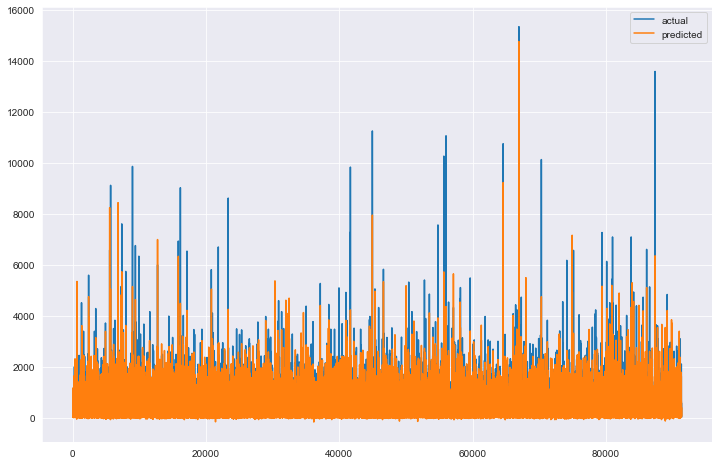

In [145]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='actual')
plt.plot(pred, label='predicted')
plt.legend();

#### The XGBoost Model performed the best in terms of RMSE, and so we will use this model to predict demand

## Forecasting number of orders on the separate data set
First, to prepare the data for the model

In [122]:
test_df = pd.read_csv('Desktop/Datasets/Food Delivery/test.csv')
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [123]:
test_df = test_df.merge(center_info_df, on='center_id')
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0


In [125]:
test = test_df[['checkout_price','base_price', 'op_area', 'meal_id',
                 'emailer_for_promotion', 'homepage_featured', 'center_id']]
test.head()

,checkout_price,base_price,op_area,meal_id,emailer_for_promotion,homepage_featured,center_id
0,158.11,159.11,2.0,1885,0,0,55
1,160.11,159.11,2.0,1993,0,0,55
2,157.14,159.14,2.0,2539,0,0,55
3,162.02,162.02,2.0,2631,0,0,55
4,163.93,163.93,2.0,1248,0,0,55


In [126]:
test.iloc[:,:3]

,checkout_price,base_price,op_area
0,158.11,159.11,2.0
1,160.11,159.11,2.0
2,157.14,159.14,2.0
3,162.02,162.02,2.0
4,163.93,163.93,2.0
...,...,...,...
32568,482.09,484.09,4.5
32569,483.09,483.09,4.5
32570,322.07,323.07,4.5
32571,322.07,323.07,4.5


In [127]:
test_scaled = scaler.transform(test.iloc[:,:3])

In [128]:
test.iloc[:,:3] = test_scaled

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [129]:
final_test = pd.get_dummies(test, columns=['meal_id', 'emailer_for_promotion', 
                                             'homepage_featured', 'center_id'])

In [130]:
final_test.head()

,checkout_price,base_price,op_area,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,...,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186
0,-1.138547,-1.213612,-1.9086,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.125470,-1.213612,-1.9086,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.144890,-1.213426,-1.9086,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.112982,-1.195506,-1.9086,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.100493,-1.183622,-1.9086,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
final_test = final_test.values

In [132]:
final_test

array([[-1.13854739, -1.21361249, -1.90859952, ...,  0.        ,
         0.        ,  0.        ],
       [-1.12547033, -1.21361249, -1.90859952, ...,  0.        ,
         0.        ,  0.        ],
       [-1.14488977, -1.21342583, -1.90859952, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.06648988, -0.19342616,  0.38143789, ...,  0.        ,
         0.        ,  0.        ],
       [-0.06648988, -0.19342616,  0.38143789, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36477766, -0.48350354,  0.38143789, ...,  0.        ,
         0.        ,  0.        ]])

### Predicting from the data

In [133]:
final_test_xgb = xgb_model.predict(final_test)

In [134]:
## Predicted values
final_test_xgb

array([292.91614, 207.57394, 125.71018, ..., 310.06808, 326.3264 ,
       225.49806], dtype=float32)

In [135]:
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0


### Adding the predicted values to the test dataset

In [136]:
test_df['num_orders'] = final_test_xgb
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,num_orders
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,292.916138
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,207.573944
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,125.710182
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,16.642326
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,11.859920


## Plotting the overall trend of the orders from Weeks 1 - 155

In [137]:
past_orders = full_df.groupby('week')['num_orders'].sum()
past_orders = pd.DataFrame(past_orders)

In [138]:
predicted_orders = test_df.groupby('week')['num_orders'].sum()
predicted_orders = pd.DataFrame(predicted_orders)

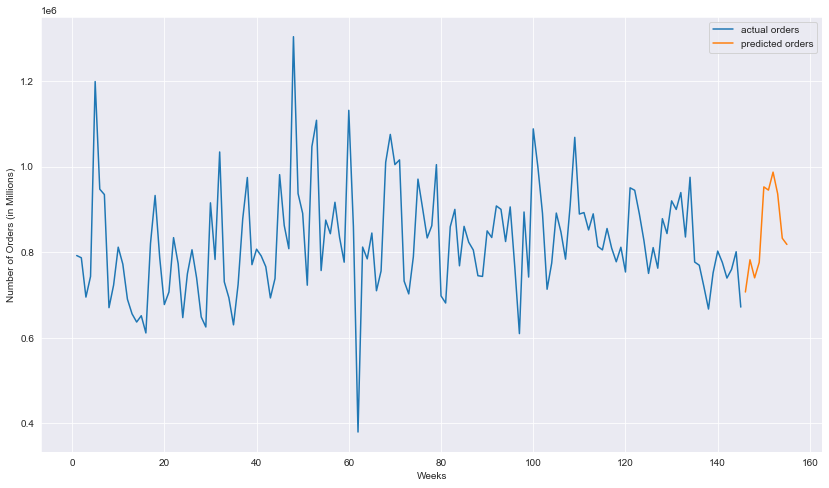

In [149]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(14,8))
plt.plot(past_orders, label='actual orders')
plt.plot(predicted_orders, label='predicted orders')
plt.ylabel('Number of Orders (in Millions)')
plt.xlabel('Weeks')
plt.legend()
fig.savefig('Food-Delivery-Forecast.png');